<a href="https://colab.research.google.com/github/IvaroEkel/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/main/TEMPLATE_Probabilistic_Machine_Learning_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilistic Machine Learning - Project Report

**Course:** Probabilistic Machine Learning (SoSe 2025)
**Lecturer:** [Lecturer Name]  
**Student(s) Name(s):**  
**GitHub Username(s):**  
**Date:**  
**PROJECT-ID:** [Assigned Project ID]  

---


## 1. Introduction

- Brief description of the dataset and problem
- Motivation for your project

<br><br>
Among the most scrutinized aspects of the game of Basketball is shooting performance—an inherently complex phenomenon influenced by a wide range of situational, spatial, and psychological factors. This project aims to explore and model player-specific shooting accuracy using comprehensive shot-level data from the 2014–2015 NBA season.

The dataset used in this project contains detailed information on nearly every shot attempted during the 2014–15 season. Each observed shot includes contextual game data (such as game ID, matchup, location, win/loss outcome, score margin), temporal indicators (game period, game clock, shot clock), as well as shot-specific attributes (dribbles before the shot, touch time, shot distance, shot result, points scored, field goals made). Crucially, the dataset also records the name and identity of the shooter, the identity and proximity of the closest defender, and the type of shot taken (e.g., 2PT or 3PT).


The following table provides brief explanations of each attribute in the dataset—each corresponding to a single shot attempt—to help readers, especially those less familiar with basketball, understand the contextual meaning of the variables used in the analysis.

<br>

| Attribute                    | Description                                                                                  |
|------------------------------|----------------------------------------------------------------------------------------------|
| `GAME_ID`                    | Unique identifier for the specific NBA game.                                                 |
| `MATCHUP`                    | The two teams playing in the game (e.g., "LAL vs BOS").                                      |
| `LOCATION`                   | Indicates if the shot was taken at home ("H") or away ("A").                                 |
| `WIN-LOSS`                   | Whether the shooter's team won or lost the game ("W" or "L").                                |
| `FINAL SCORE MARGIN`         | Point difference between the teams at the end of the game.                                   |
| `SHOT_NUMBER`                | The sequence number of the shot by the player in that game.                                  |
| `PERIOD`                     | Game period (1–4 for quarters, 5+ for overtime periods).                                     |
| `GAME_CLOCK`                 | Time left in the current period when the shot was taken (e.g., "02:35").                     |
| `SHOT_CLOCK`                 | Seconds remaining on the shot clock (24 seconds max) when the shot was taken.                |
| `DRIBBLES`                   | Number of dribbles taken by the player before attempting the shot.                           |
| `TOUCH_TIME`                 | How long (in seconds) the player held the ball before shooting.                              |
| `SHOT_DISTANCE`              | Distance from the basket (in feet) at which the shot was taken.                              |
| `PTS_TYPE`                   | Type of shot based on scoring value: 2 (2-point shot) or 3 (3-point shot).                   |
| `SHOT_RESULT`                | Whether the shot was made ("made") or missed ("missed").                                     |
| `CLOSEST_DEFENDER`           | Name of the defender closest to the shooter at the moment of the shot.                       |
| `CLOSEST_DEFENDER_PLAYER_ID` | Unique ID of the closest defender.                                                           |
| `CLOSE_DEF_DIST`             | Distance (in feet) between shooter and closest defender.                                     |
| `FGM`                        | Field Goal Made: binary variable (1 if made, 0 if missed).                                   |
| `PTS`                        | Points scored by the shooter on that shot (0, 2, or 3).                                      |
| `player_name`                | Name of the player who took the shot.                                                        |
| `player_id`                  | Unique identifier of the player who took the shot.                                           |

<br><br>

#### Motivation

This rich and multidimensional dataset enables a detailed investigation into how various in-game factors affect shooting success on a player-by-player basis. The central motivation for this project is to model shooting percentages individually for each player and to understand how situational and environmental variables influence their shooting efficiency. For instance, do some players exhibit a significant decline in shooting accuracy under high-pressure scenarios, such as during clutch moments late in the game? How does shooting performance vary with increasing shot distance or as the proximity of the closest defender decreases? These questions touch not only on spatial and statistical relationships but also on potential psychological influences on player performance.

To capture these dynamics, I apply Bayesian logistic regression, modeling the probability of a shot being successful (i.e., a made field goal) as a function of relevant covariates. The binary nature of the response variable—made or missed shot—naturally lends itself to logistic regression. A Bayesian framework offers several advantages in this context: it allows for incorporating prior knowledge or regularization to account for limited data on specific players or situations; it produces full posterior distributions of the parameters, which is particularly valuable when dealing with uncertainty; and it enables hierarchical modeling, which can be extended to share information across players while still allowing individual-specific effects.

In summary, this project leverages advanced statistical modeling to examine NBA shooting data with the aim of uncovering deeper insights into individual player tendencies and the contextual factors that influence shooting success. The results can contribute to a more nuanced understanding of player efficiency and the psychological or tactical dimensions of shot-making in professional basketball.

<br><br>


## 2. Data Loading and Exploration

- Code to load data
- Basic exploration (plots, statistics, missing data, etc.)



In [ ]:
# load data:

shot_logs = pd.read_csv('../data/shot_logs.csv')

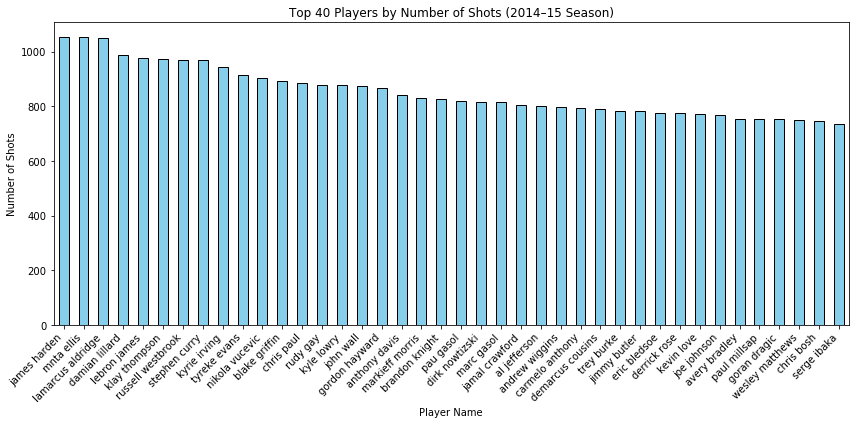

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Gruppieren nach Spielername und Anzahl der Würfe zählen
shot_counts = shot_logs['player_name'].value_counts().sort_values(ascending=False)

# Optional: Top N Spieler anzeigen (z. B. Top 20)
top_n = 40
shot_counts_top = shot_counts.head(top_n)

# Barplot erstellen
plt.figure(figsize=(12, 6))
shot_counts_top.plot(kind='bar', color='skyblue', edgecolor='black')

# Achsenbeschriftungen und Titel
plt.xlabel('Player Name')
plt.ylabel('Number of Shots')
plt.title(f'Top {top_n} Players by Number of Shots (2014–15 Season)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plot anzeigen
plt.show()


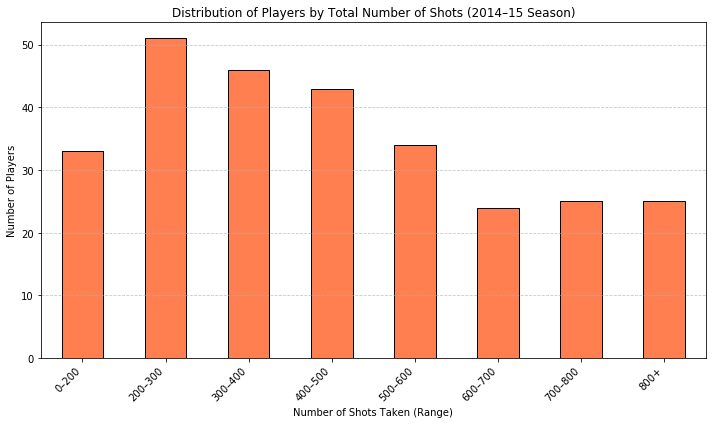

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wurfanzahl pro Spieler berechnen
shot_counts = shot_logs['player_name'].value_counts()

# Ranges definieren (Bins)
bins = [0, 200, 300, 400, 500, 600, 700, 800, 2000]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-2)]
labels.append('800+')

# Spieler den entsprechenden Ranges zuordnen
shot_bins = pd.cut(shot_counts, bins=bins, labels=labels, right=False)

# Spieler pro Range zählen
range_counts = shot_bins.value_counts().sort_index()

# Barplot erstellen
plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='coral', edgecolor='black')

# Achsenbeschriftungen und Titel
plt.xlabel('Number of Shots Taken (Range)')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Total Number of Shots (2014–15 Season)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot anzeigen
plt.show()


## 3. Data Preprocessing

- Steps taken to clean or transform the data




In [16]:
import pandas as pd
import numpy as np

def validate_data(df):
    """Perform comprehensive data validation on the basketball shots dataset"""
    
    # Initialize results dictionary
    validation_results = {
        'missing_values': {},
        'format_issues': {},
        'consistency_issues': []
    }
    
    # 1. Check for missing values in each column
    validation_results['missing_values'] = df.isnull().sum().to_dict()
    
    # 2. Check specific formatting issues
    format_issues = {}
    
    # Check GAME_CLOCK format (MM:SS)
    game_clock_ok = df['GAME_CLOCK'].str.match(r'^\d{1,2}:\d{2}$') | df['GAME_CLOCK'].isna()
    if not game_clock_ok.all():
        format_issues['GAME_CLOCK'] = f"{sum(~game_clock_ok)} rows with unexpected format"
    
    # Check SHOT_CLOCK values (between 0 and 24 or NaN)
    shot_clock_issues = df['SHOT_CLOCK'].apply(lambda x: not (np.isnan(x) or (0 <= x <= 24)))
    if shot_clock_issues.any():
        format_issues['SHOT_CLOCK'] = f"{shot_clock_issues.sum()} rows with values outside 0-24 range"
    
    # Check LOCATION values (only A or H)
    location_issues = ~df['LOCATION'].isin(['A', 'H'])
    if location_issues.any():
        format_issues['LOCATION'] = f"{location_issues.sum()} rows with invalid location codes"
    
    # Check PERIOD values (1-4 for regulation, 5+ for OT)
    period_issues = df['PERIOD'] < 1
    if period_issues.any():
        format_issues['PERIOD'] = f"{period_issues.sum()} rows with invalid period numbers"
    
    validation_results['format_issues'] = format_issues
    
    # 3. Check data consistency
    consistency_issues = []
    
    # FGM should match SHOT_RESULT
    fgm_mismatch = (df['FGM'] == 1) != (df['SHOT_RESULT'] == 'made')
    if fgm_mismatch.any():
        consistency_issues.append(f"FGM/SHOT_RESULT mismatch in {fgm_mismatch.sum()} rows")
    
    # PTS should match PTS_TYPE when shot is made
    pts_mismatch = (df['FGM'] == 1) & (df['PTS'] != df['PTS_TYPE'])
    if pts_mismatch.any():
        consistency_issues.append(f"PTS/PTS_TYPE mismatch in {pts_mismatch.sum()} rows")
    
    # SHOT_DIST should be positive
    shot_dist_issues = df['SHOT_DIST'] < 0
    if shot_dist_issues.any():
        consistency_issues.append(f"Negative SHOT_DIST in {shot_dist_issues.sum()} rows")
    
    validation_results['consistency_issues'] = consistency_issues
    
    return validation_results

def generate_report(validation_results):
    """Generate a human-readable report from validation results"""
    report = []
    
    # Missing values section
    report.append("=== MISSING VALUES ===")
    missing_values = validation_results['missing_values']
    if any(missing_values.values()):
        for col, count in missing_values.items():
            if count > 0:
                report.append(f"{col}: {count} missing values")
    else:
        report.append("No missing values found in any column")
    
    # Format issues section
    report.append("\n=== FORMAT ISSUES ===")
    format_issues = validation_results['format_issues']
    if format_issues:
        for col, issue in format_issues.items():
            report.append(f"{col}: {issue}")
    else:
        report.append("No formatting issues found")
    
    # Consistency issues section
    report.append("\n=== CONSISTENCY ISSUES ===")
    consistency_issues = validation_results['consistency_issues']
    if consistency_issues:
        for issue in consistency_issues:
            report.append(issue)
    else:
        report.append("No consistency issues found")
    
    return "\n".join(report)

def identify_problematic_rows(df, validation_results):
    """Identify rows with any issues"""
    mask = pd.Series(False, index=df.index)
    
    # Missing values
    for col, count in validation_results['missing_values'].items():
        if count > 0:
            mask |= df[col].isna()
    
    if 'GAME_CLOCK' in validation_results['format_issues']:
        mask |= ~df['GAME_CLOCK'].str.match(r'^\d{1,2}:\d{2}$')
    
    # Consistency issues
    mask |= (df['FGM'] == 1) != (df['SHOT_RESULT'] == 'made')
    mask |= (df['FGM'] == 1) & (df['PTS'] != df['PTS_TYPE'])
    mask |= (df['SHOT_DIST'] < 0)
    
    return df[mask]


def main():
    # Load the dataset
    try:
        df = pd.read_csv('../data/shot_logs.csv')
    except FileNotFoundError:
        print("Error: File not found. Please check the filename and path.")
        return
    
    # Perform validation
    validation_results = validate_data(df)
    
    # Generate and print report
    report = generate_report(validation_results)
    print(report)
    
    # Save problematic rows to a file for inspection
    if any(validation_results['missing_values'].values()) or validation_results['format_issues'] or validation_results['consistency_issues']:
        problematic_rows = identify_problematic_rows(df, validation_results)
        problematic_rows.to_csv('problematic_rows.csv', index=False)
        print("\nProblematic rows saved to 'problematic_rows.csv'")


if __name__ == '__main__':
    main()

=== MISSING VALUES ===
SHOT_CLOCK: 5567 missing values

=== FORMAT ISSUES ===
No formatting issues found

=== CONSISTENCY ISSUES ===
No consistency issues found

Problematic rows saved to 'problematic_rows.csv'


## 4. Probabilistic Modeling Approach

- Description of the models chosen
- Why they are suitable for your problem
- Mathematical formulations (if applicable)



## 5. Model Training and Evaluation

- Training process
- Model evaluation (metrics, plots, performance)
- Cross-validation or uncertainty quantification



## 6. Results

- Present key findings
- Comparison of models if multiple approaches were used



## 7. Discussion

- Interpretation of results
- Limitations of the approach
- Possible improvements or extensions



## 8. Conclusion

- Summary of main outcomes



## 9. References

- Cite any papers, datasets, or tools used